Data Overview:
      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5              

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\804399145.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\804399145.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\804399145.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is depre

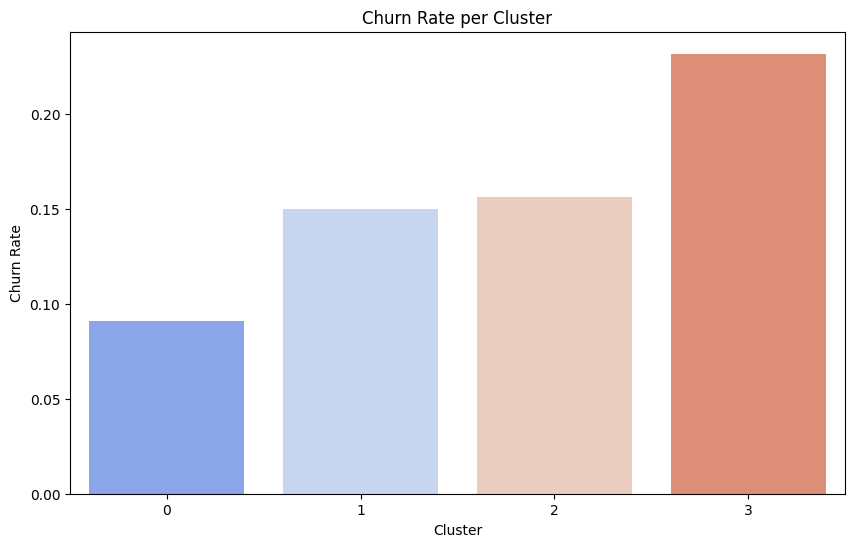


Cluster 1 Characteristics:
Attrition_Flag                        0.149881
Customer_Age                         46.567342
Gender                                0.002086
Dependent_count                       2.440405
Months_on_book                       36.115614
Total_Relationship_Count              3.867700
Months_Inactive_12_mon                2.325685
Contacts_Count_12_mon                 2.486591
Credit_Limit                      12755.785995
Total_Revolving_Bal                1187.508045
Total_Amt_Chng_Q4_Q1                  0.767548
Total_Trans_Amt                    4232.736293
Total_Trans_Ct                       61.801847
Total_Ct_Chng_Q4_Q1                   0.714203
Avg_Utilization_Ratio                 0.184927
Education_Level_College               0.100417
Education_Level_Doctorate             0.043504
Education_Level_Graduate              0.299166
Education_Level_High School           0.210072
Education_Level_Post-Graduate         0.049762
Education_Level_Uneducated      

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Inspect Data
data = pd.read_csv('BankChurners.csv')
data.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Avg_Open_To_Buy'], inplace=True)

# Overview of the dataset
print("Data Overview:")
print(data.head())
print("Shape:", data.shape)

# Step 2: Preprocessing
# Encode target and binary categorical features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode other categorical columns
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns='{}_Unknown'.format(col))], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

data.drop(columns=categorical_cols, inplace=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['Attrition_Flag']))

# Step 3: Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze Clusters with Respect to Churn
clustered_data = data.copy()

# Churn rate per cluster
churn_rate_per_cluster = clustered_data.groupby('KMeans_Cluster')['Attrition_Flag'].mean()

# Summary statistics for clusters
summary_stats = clustered_data.groupby('KMeans_Cluster').mean()

# Step 5: Visualize Churn Rate per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_per_cluster.index, y=churn_rate_per_cluster.values, palette='coolwarm')
plt.title('Churn Rate per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

# Step 6: Examine Key Features for Clusters
for cluster in clustered_data['KMeans_Cluster'].unique():
    print(f"\nCluster {cluster} Characteristics:")
    print(clustered_data[clustered_data['KMeans_Cluster'] == cluster].mean())

# Step 7: Insights
print("\nChurn Rate per Cluster:")
print(churn_rate_per_cluster)
print("\nSummary Statistics:")
print(summary_stats)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Reload and preprocess the dataset
data = pd.read_csv('BankChurners.csv')
data.drop(columns=['CLIENTNUM', 'Avg_Open_To_Buy'], inplace=True)

# Encode target and categorical features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical variables
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features for clustering
features = data.drop(columns=['Attrition_Flag'])  # Exclude the target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, data['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Analyze Clusters
cluster_summary = data.groupby('KMeans_Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Churn Rates
churn_rate_per_cluster = data.groupby('KMeans_Cluster')['Attrition_Flag'].mean()
print("\nChurn Rate by Cluster:")
print(churn_rate_per_cluster)


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2884371794.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2884371794.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


KMeans Silhouette Score: 0.0871257227494567

Cluster Summary:
                Attrition_Flag  Customer_Age    Gender  Dependent_count  \
KMeans_Cluster                                                            
0                     0.000000     46.487032  0.919643         2.269133   
1                     1.000000     46.657846  0.572308         2.402462   
2                     0.000527     45.984466  0.026856         2.417588   

                Months_on_book  Total_Relationship_Count  \
KMeans_Cluster                                             
0                    36.036352                  3.917730   
1                    36.177231                  3.277538   
2                    35.688257                  3.911269   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
KMeans_Cluster                                                                
0                             2.292517               2.313350   4528.846556   
1                       

Note: you may need to restart the kernel to use updated packages.
Data Shape: (10127, 33)
Null Values:
 Attrition_Flag                    0
Customer_Age                      0
Gender                            0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Education_Level_College           0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Income_Category_$120K +           0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K    

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\145766401.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\145766401.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


KMeans Silhouette Score: 0.0873
--- DBSCAN Parameter Tuning ---
DBSCAN: eps=0.1, min_samples=3, no valid clusters found.
DBSCAN: eps=0.1, min_samples=5, no valid clusters found.
DBSCAN: eps=0.1, min_samples=7, no valid clusters found.
DBSCAN: eps=0.1, min_samples=9, no valid clusters found.
DBSCAN: eps=0.30000000000000004, min_samples=3, no valid clusters found.
DBSCAN: eps=0.30000000000000004, min_samples=5, no valid clusters found.
DBSCAN: eps=0.30000000000000004, min_samples=7, no valid clusters found.
DBSCAN: eps=0.30000000000000004, min_samples=9, no valid clusters found.
DBSCAN: eps=0.5000000000000001, min_samples=3, no valid clusters found.
DBSCAN: eps=0.5000000000000001, min_samples=5, no valid clusters found.
DBSCAN: eps=0.5000000000000001, min_samples=7, no valid clusters found.
DBSCAN: eps=0.5000000000000001, min_samples=9, no valid clusters found.
DBSCAN: eps=0.7000000000000001, min_samples=3, no valid clusters found.
DBSCAN: eps=0.7000000000000001, min_samples=5, no valid 

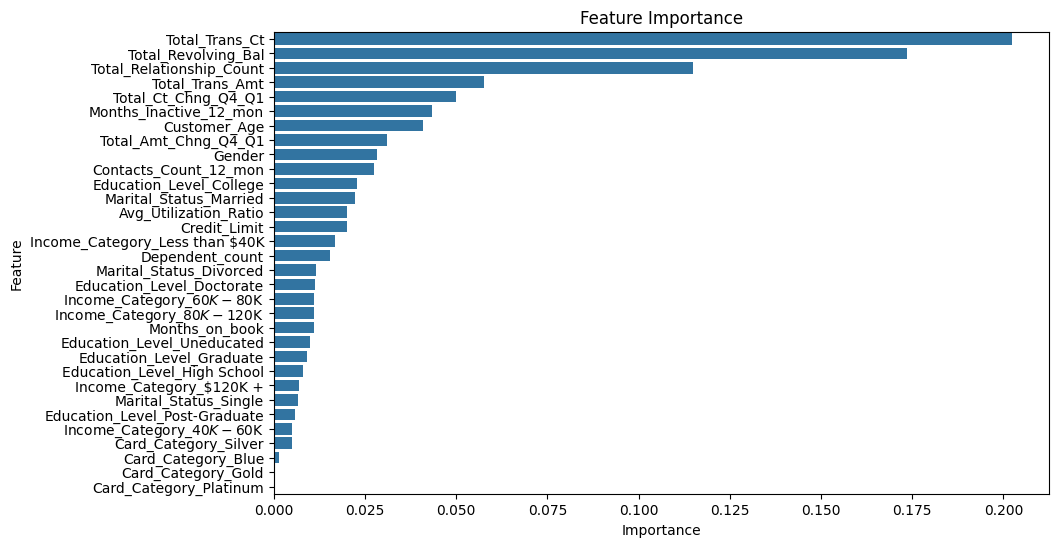


Cluster Summary:
                Attrition_Flag  Customer_Age    Gender  Dependent_count  \
KMeans_Cluster                                                            
0                     0.167488     46.504105  0.926108         2.284984   
1                     0.156295     45.691751  0.371925         2.479016   
2                     0.151960     46.189886  0.006321         2.407838   

                Months_on_book  Total_Relationship_Count  \
KMeans_Cluster                                             
0                    36.077358                  3.834154   
1                    35.487699                  3.319826   
2                    35.798989                  3.868774   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
KMeans_Cluster                                                                
0                             2.361795               2.422186   4145.612443   
1                             2.279305               2.451520  25949

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\145766401.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm')


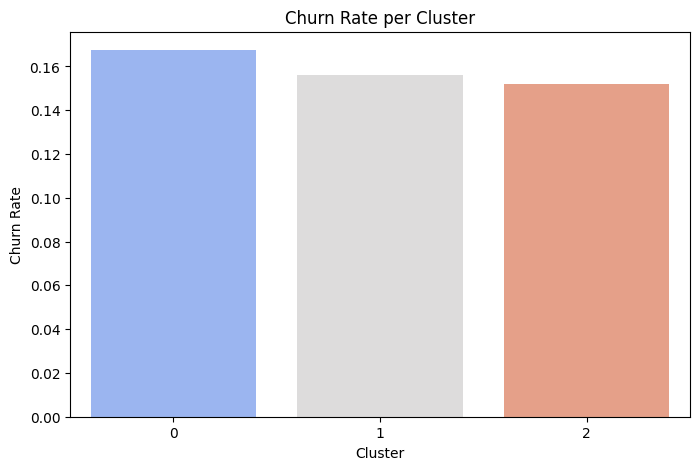


Baseline Churn Rate: 0.1606596227905599
High-Risk Clusters:
 KMeans_Cluster
0    0.167488
Name: Attrition_Flag, dtype: float64


In [3]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Ensure all necessary libraries are installed
%pip install seaborn xgboost scikit-learn

# Load dataset
data = pd.read_csv('BankChurners.csv')

### Step 1: Data Preprocessing
# Drop irrelevant columns
data.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'Avg_Open_To_Buy'
], inplace=True)

# Encode target variable and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([
            data, 
            pd.get_dummies(data[col], prefix=col).drop(columns=f'{col}_Unknown')
        ], axis=1)
    else:
        data = pd.concat([
            data, 
            pd.get_dummies(data[col], prefix=col)
        ], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Confirm data is cleaned
print("Data Shape:", data.shape)
print("Null Values:\n", data.isnull().sum())

### Step 2: Feature Scaling
# Separate features (X) and target (y)
y = data['Attrition_Flag']
X = data.drop(columns=['Attrition_Flag'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3: Clustering Methods
def clustering_evaluation(X, method='KMeans'):
    if method == 'KMeans':
        model = KMeans(n_clusters=3, random_state=42)
    elif method == 'DBSCAN':
        model = DBSCAN(eps=1, min_samples=5)
    elif method == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=3)
    elif method == 'GMM':
        model = GaussianMixture(n_components=3, random_state=42)
    else:
        return None
    
    clusters = model.fit_predict(X)
    silhouette = silhouette_score(X, clusters)
    print(f"{method} Silhouette Score: {silhouette:.4f}")
    return clusters

# KMeans Clustering
print("--- KMeans Clustering ---")
kmeans_clusters = clustering_evaluation(X_scaled, method='KMeans')

### DBSCAN Parameter Tuning and Clustering ###
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

def dbscan_tuning(X, eps_values, min_samples_values):
    """
    Tunes DBSCAN parameters to find the best eps and min_samples
    that result in meaningful clusters.
    """
    best_eps, best_min_samples = None, None
    best_score = -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)

            # Check for at least 2 clusters to compute silhouette score
            if len(np.unique(clusters)) > 1:
                score = silhouette_score(X, clusters)
                print(f"DBSCAN: eps={eps}, min_samples={min_samples}, silhouette={score:.4f}")
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = clusters
            else:
                print(f"DBSCAN: eps={eps}, min_samples={min_samples}, no valid clusters found.")
    
    print(f"\nBest DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_score:.4f}")
    return best_labels

# Parameter grid for DBSCAN
eps_values = np.arange(0.1, 2.0, 0.2)  # Range of eps values
min_samples_values = range(3, 10, 2)   # Range for min_samples

# Run DBSCAN tuning
print("--- DBSCAN Parameter Tuning ---")
dbscan_clusters = dbscan_tuning(X_scaled, eps_values, min_samples_values)

# Add DBSCAN Clusters to Data
if dbscan_clusters is not None:
    data['DBSCAN_Cluster'] = dbscan_clusters
    print("\nDBSCAN Cluster Distribution:")
    print(data['DBSCAN_Cluster'].value_counts())
else:
    print("\nNo valid DBSCAN clusters found. Adjust parameter ranges.")


# Agglomerative Clustering
print("--- Agglomerative Clustering ---")
agglo_clusters = clustering_evaluation(X_scaled, method='Agglomerative')

# Gaussian Mixture Clustering
print("--- Gaussian Mixture Clustering ---")
gmm_clusters = clustering_evaluation(X_scaled, method='GMM')

### Step 4: Feature Importance with XGBoost
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Extract Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display Feature Importance
print("Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Importance', data=feature_importance)
plt.title('Feature Importance')
plt.show()

### Step 5: Cluster Insights
# Append KMeans Clusters to Data
data['KMeans_Cluster'] = kmeans_clusters
cluster_summary = data.groupby('KMeans_Cluster').mean()

print("\nCluster Summary:")
print(cluster_summary)

# Compare Churn Rates Across Clusters
churn_rate = data.groupby('KMeans_Cluster')['Attrition_Flag'].mean()
print("\nChurn Rate per Cluster:\n", churn_rate)

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm')
plt.title('Churn Rate per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

print("\nBaseline Churn Rate:", y.mean())
print("High-Risk Clusters:\n", churn_rate[churn_rate > y.mean()])




Updated Feature Set: Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Data Overview:
      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  M

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2835416141.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2835416141.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


K-Means Silhouette Score: 0.09

--- DBSCAN Clustering ---
DBSCAN Silhouette Score: -1.00

--- Gaussian Mixture Clustering ---

--- Agglomerative Clustering ---
Agglomerative Silhouette Score: 0.09


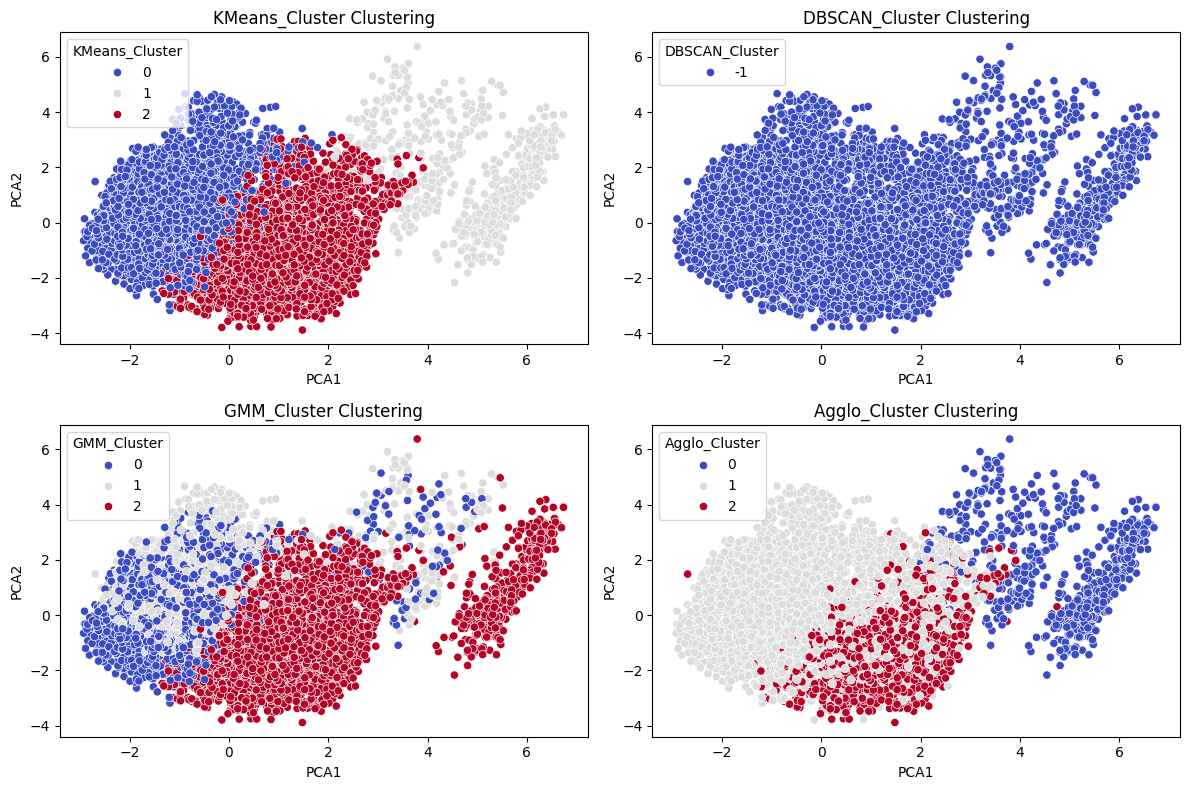


Churn Rate by KMeans_Cluster:
KMeans_Cluster
0    0.167488
1    0.156295
2    0.151960
Name: Attrition_Flag, dtype: float64

Churn Rate by DBSCAN_Cluster:
DBSCAN_Cluster
-1    0.16066
Name: Attrition_Flag, dtype: float64

Churn Rate by GMM_Cluster:
GMM_Cluster
0    0.161168
1    0.169978
2    0.153508
Name: Attrition_Flag, dtype: float64

Churn Rate by Agglo_Cluster:
Agglo_Cluster
0    0.157895
1    0.163525
2    0.153216
Name: Attrition_Flag, dtype: float64


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Step 2: Load and Clean Dataset
data = pd.read_csv('BankChurners.csv')

# Drop CLIENTNUM, Naive Bayes features, and redundant features
data.drop(columns=['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Avg_Open_To_Buy'],
          inplace=True)

# Overview
print("Updated Feature Set:", data.columns)
print("Data Overview:")
print(data.head())
print("Shape of data:", data.shape)
print("Null Values:")
print(data.isnull().sum())

# Encode target variable and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns=f'{col}_Unknown')], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Confirm Cleaned Data
print("Cleaned Data:")
print(data.head())
print("Updated Shape:", data.shape)

# Step 3: Scale Numerical Features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Attrition_Flag'])), 
                 columns=data.drop(columns=['Attrition_Flag']).columns)

# Step 4: Clustering Methods
def clustering_pipeline(model, name, X):
    """ Function to run clustering model and calculate silhouette score """
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    print(f"{name} Silhouette Score: {silhouette:.2f}")
    return labels

# K-Means
print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=3, random_state=42)
X['KMeans_Cluster'] = clustering_pipeline(kmeans, "K-Means", X)

# DBSCAN
print("\n--- DBSCAN Clustering ---")
dbscan = DBSCAN(eps=0.5, min_samples=10)
X['DBSCAN_Cluster'] = clustering_pipeline(dbscan, "DBSCAN", X)

# Gaussian Mixture
print("\n--- Gaussian Mixture Clustering ---")
gmm = GaussianMixture(n_components=3, random_state=42)
X['GMM_Cluster'] = gmm.fit_predict(X)

# Agglomerative Clustering
print("\n--- Agglomerative Clustering ---")
agglo = AgglomerativeClustering(n_clusters=3)
X['Agglo_Cluster'] = clustering_pipeline(agglo, "Agglomerative", X)

# Step 5: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']))
X['PCA1'], X['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Visualization of Clusters
plt.figure(figsize=(12, 8))
for i, cluster in enumerate(['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x='PCA1', y='PCA2', hue=cluster, data=X, palette='coolwarm', legend='full')
    plt.title(f"{cluster} Clustering")
plt.tight_layout()
plt.show()

# Step 6: Post-Clustering Analysis
X['Attrition_Flag'] = data['Attrition_Flag'].reset_index(drop=True)

for cluster_col in ['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']:
    print(f"\nChurn Rate by {cluster_col}:")
    print(X.groupby(cluster_col)['Attrition_Flag'].mean())


Updated Feature Set: Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Data Overview:
      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  M

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2835416141.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_7852\2835416141.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


K-Means Silhouette Score: 0.09

--- DBSCAN Clustering ---
DBSCAN Silhouette Score: -1.00

--- Gaussian Mixture Clustering ---

--- Agglomerative Clustering ---
Agglomerative Silhouette Score: 0.09


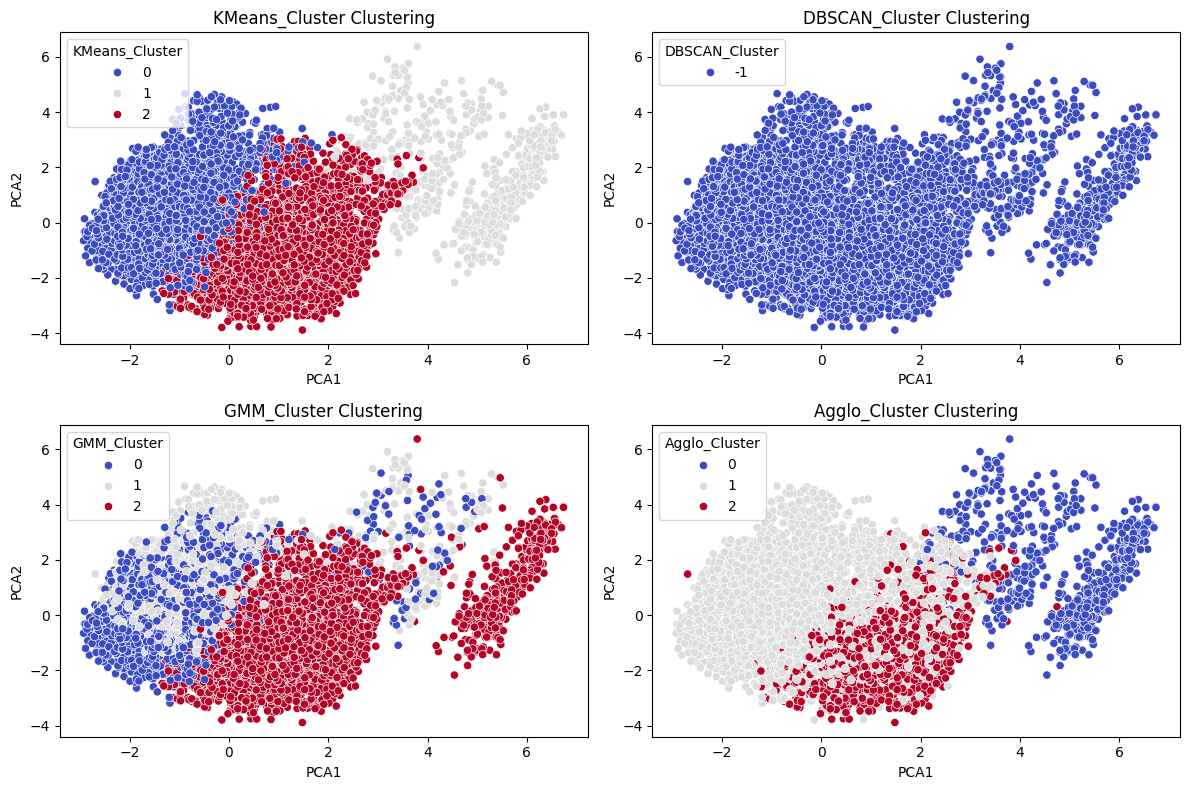


Churn Rate by KMeans_Cluster:
KMeans_Cluster
0    0.167488
1    0.156295
2    0.151960
Name: Attrition_Flag, dtype: float64

Churn Rate by DBSCAN_Cluster:
DBSCAN_Cluster
-1    0.16066
Name: Attrition_Flag, dtype: float64

Churn Rate by GMM_Cluster:
GMM_Cluster
0    0.161168
1    0.169978
2    0.153508
Name: Attrition_Flag, dtype: float64

Churn Rate by Agglo_Cluster:
Agglo_Cluster
0    0.157895
1    0.163525
2    0.153216
Name: Attrition_Flag, dtype: float64


In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Step 2: Load and Clean Dataset
data = pd.read_csv('BankChurners.csv')

# Drop CLIENTNUM, Naive Bayes features, and redundant features
data.drop(columns=['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Avg_Open_To_Buy'],
          inplace=True)

# Overview
print("Updated Feature Set:", data.columns)
print("Data Overview:")
print(data.head())
print("Shape of data:", data.shape)
print("Null Values:")
print(data.isnull().sum())

# Encode target variable and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns=f'{col}_Unknown')], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Confirm Cleaned Data
print("Cleaned Data:")
print(data.head())
print("Updated Shape:", data.shape)

# Step 3: Scale Numerical Features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Attrition_Flag'])), 
                 columns=data.drop(columns=['Attrition_Flag']).columns)

# Step 4: Clustering Methods
def clustering_pipeline(model, name, X):
    """ Function to run clustering model and calculate silhouette score """
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    print(f"{name} Silhouette Score: {silhouette:.2f}")
    return labels

# K-Means
print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=3, random_state=42)
X['KMeans_Cluster'] = clustering_pipeline(kmeans, "K-Means", X)

# DBSCAN
print("\n--- DBSCAN Clustering ---")
dbscan = DBSCAN(eps=0.5, min_samples=10)
X['DBSCAN_Cluster'] = clustering_pipeline(dbscan, "DBSCAN", X)

# Gaussian Mixture
print("\n--- Gaussian Mixture Clustering ---")
gmm = GaussianMixture(n_components=3, random_state=42)
X['GMM_Cluster'] = gmm.fit_predict(X)

# Agglomerative Clustering
print("\n--- Agglomerative Clustering ---")
agglo = AgglomerativeClustering(n_clusters=3)
X['Agglo_Cluster'] = clustering_pipeline(agglo, "Agglomerative", X)

# Step 5: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']))
X['PCA1'], X['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Visualization of Clusters
plt.figure(figsize=(12, 8))
for i, cluster in enumerate(['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x='PCA1', y='PCA2', hue=cluster, data=X, palette='coolwarm', legend='full')
    plt.title(f"{cluster} Clustering")
plt.tight_layout()
plt.show()

# Step 6: Post-Clustering Analysis
X['Attrition_Flag'] = data['Attrition_Flag'].reset_index(drop=True)

for cluster_col in ['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'Agglo_Cluster']:
    print(f"\nChurn Rate by {cluster_col}:")
    print(X.groupby(cluster_col)['Attrition_Flag'].mean())
